# Probabilistic machine learning
## Deep learning multi-model ensemble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from scipy.stats import norm
sns.set()

/mnt/c/Users/jwilliams/Documents/GitHub/probablistic_deep_learning/env/lib/python3.9/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## Usecase: linear RUL

In [19]:
# Define linear function
def func(x, a, c, noise_amp = 0):
    y = a*x + c
    y = y + noise_amp * np.random.randn(len(x))
    return y

# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)

In [20]:
# Train the model

n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [12:35<00:00,  7.56s/it]

Done


In [21]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 149.65it/s]


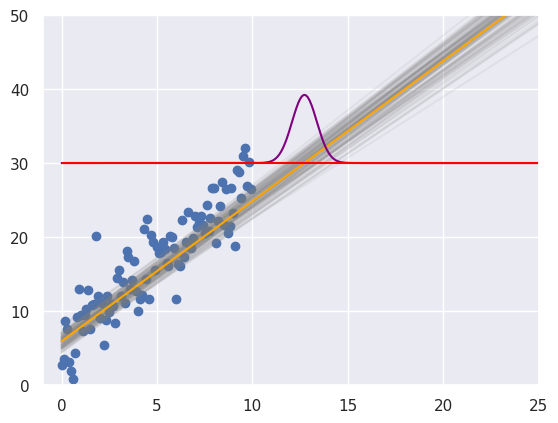

In [24]:
idx = 0

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

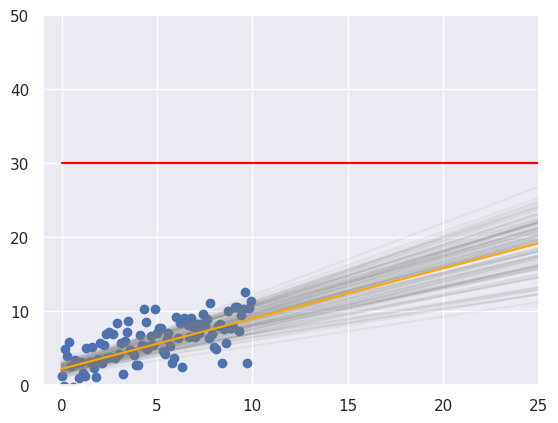

In [25]:
idx = 2

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

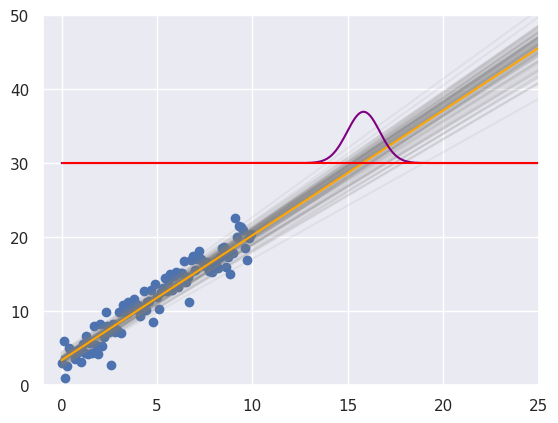

In [26]:
idx = 3

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

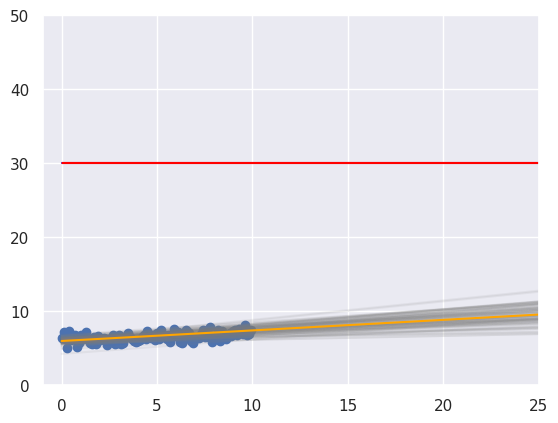

In [27]:
idx = 4

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

**Correlate std to error**

In [28]:
rul_true_list = []
rul_mean_list = []
rul_std_list = []
x100 = np.arange(0, 100, 0.1)
limit = 30

for idx, a in tqdm(enumerate(a_list)):
    # Find the true RUL
    c = c_list[idx]
    y_true = func(x100, a, c)
    rul_true = x100[np.abs(y_true - limit).argmin()]
    rul_true_list.append(rul_true)

    # Calculate the probabilitic 
    rul_discrete_dist = []
    for idx_reg in range(n_regessors):
        y_pred_idx = func(x100, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
        idx_rul = np.abs(y_pred_idx - limit).argmin()
        rul = x100[idx_rul]
        rul_discrete_dist.append(rul)
    
    rul_mean_list.append(np.mean(rul_discrete_dist))
    rul_std_list.append(np.std(rul_discrete_dist))

1000it [00:06, 158.37it/s]


In [29]:
data = {'noise':noise_list, 'rul_true':rul_true_list, 'rul_pred_mean':rul_mean_list, 'rul_pred_std':rul_std_list}
df = pd.DataFrame(data)
df['rul_pred_error'] = df.rul_pred_mean - df.rul_true
df['rul_pred_error_abs'] = df.rul_pred_error.abs()

# remove ruls that are very far in the future
df = df.loc[df.rul_true <= 80, :]
df.reset_index(drop=True, inplace=True)

df

,noise,rul_true,rul_pred_mean,rul_pred_std,rul_pred_error,rul_pred_error_abs
0,2.868773,12.2,12.729,0.648428,0.529,0.529
1,2.917565,61.5,53.361,14.036024,-8.139,8.139
2,2.089217,38.6,42.914,10.146655,4.314,4.314
3,1.629763,15.4,15.824,0.861988,0.424,0.424
4,0.827382,50.4,51.402,9.775766,1.002,1.002
...,...,...,...,...,...,...
837,1.563743,40.1,51.484,9.742471,11.384,11.384
838,1.365393,11.5,11.467,0.416667,-0.033,0.033
839,1.299225,24.8,24.125,2.090042,-0.675,0.675
840,2.133508,21.9,21.938,2.258441,0.038,0.038


/tmp/ipykernel_4949/242634322.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Noise')


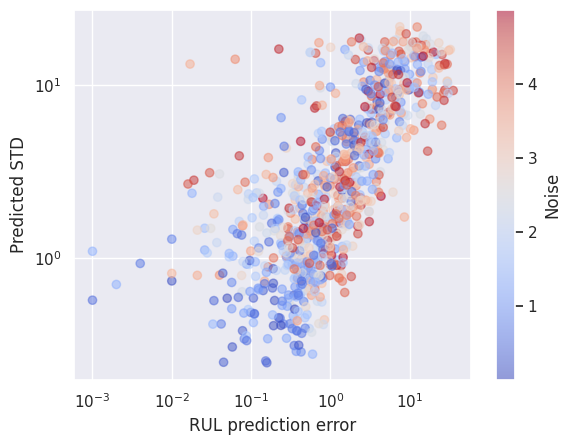

In [30]:
x = df.rul_pred_error_abs
y = df.rul_pred_std
z = df.noise
plt.scatter(x, y, c=z, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.show()

## Usecase: Linear RUL with dropped data

In [82]:
def drop_data(array, drop_frac_list):
    '''drop_frac: list of [0,1]'''
    for array_idx, x in enumerate(array):
        drop_frac = drop_frac_list[array_idx]
        n_drop = int(len(x) * drop_frac)
        idx_list = np.arange(len(x))
        idx_drop = np.random.choice(idx_list, size = n_drop, replace=False)
        x[idx_drop] = np.nan
        # for idx in idx_drop:
        #     x[idx] = np.nan
        array[array_idx] = x
        
    return array

# Set parameter limits
x = np.arange(0,10,0.1)
a_range = (0, 2)
c_range = (0, 10)
noise_range = (0,5)
drop_range = (0,0.9)

In [90]:
# Train the model

n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
    features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
    
    drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]
    features = drop_data(features, drop_frac_list)

    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [08:39<00:00,  5.19s/it]

Done


**Test the data**

In [91]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]
drop_frac_list = np.random.rand(n_training_obs)*(drop_range[1] - drop_range[0]) + drop_range[0]

targets = np.array(list(zip(a_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,c_list,noise_list)))
features = np.array([func(x,a,c,noise) for a, c, noise in targets_with_noise])
features = drop_data(features, drop_frac_list)

a_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, c = result.T
    a_pred.append(a)
    c_pred.append(c)

a_pred = np.array(a_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 104.83it/s]


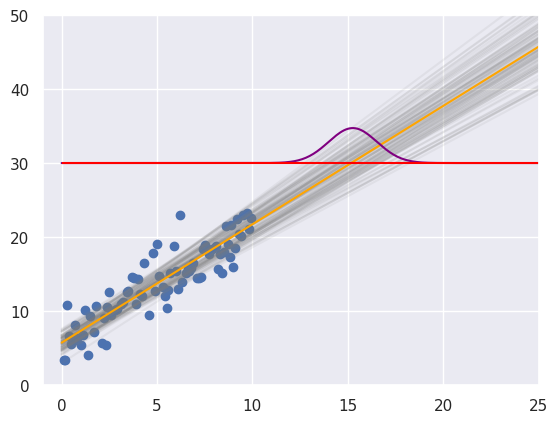

In [92]:
idx = 2

limit = 30
x30 = np.arange(0,30,0.1)
rul_list = []

for idx_reg in range(n_regessors):
    y_pred_idx = func(x30, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
    plt.plot(x30, y_pred_idx, color='grey', alpha=0.1)
    idx_rul = np.abs(y_pred_idx - limit).argmin()
    rul = x30[idx_rul]
    rul_list.append(rul)

y_pred_mean = func(x30, a_mean[idx], c_mean[idx])
plt.plot(x30, y_pred_mean, color='orange')

rul_list = np.array(rul_list)
rul_mean = rul_list.mean()
rul_std = rul_list.std()
rul_pdf = norm.pdf(x30, rul_mean, rul_std)
plt.plot(x30, (rul_pdf*15)+30, color='purple')

plt.hlines(limit, 0, 30, color='red')
plt.scatter(x, features[idx])

plt.xlim(-1,25)
plt.ylim(0,50)
plt.show()

In [93]:
rul_true_list = []
rul_mean_list = []
rul_std_list = []
x100 = np.arange(0, 100, 0.1)
limit = 30

for idx, a in tqdm(enumerate(a_list)):
    # Find the true RUL
    c = c_list[idx]
    y_true = func(x100, a, c)
    rul_true = x100[np.abs(y_true - limit).argmin()]
    rul_true_list.append(rul_true)

    # Calculate the probabilitic 
    rul_discrete_dist = []
    for idx_reg in range(n_regessors):
        y_pred_idx = func(x100, a_pred[idx][idx_reg], c_pred[idx][idx_reg])
        idx_rul = np.abs(y_pred_idx - limit).argmin()
        rul = x100[idx_rul]
        rul_discrete_dist.append(rul)
    
    rul_mean_list.append(np.mean(rul_discrete_dist))
    rul_std_list.append(np.std(rul_discrete_dist))

data = {'noise':noise_list, 'drop_frac':drop_frac_list,
        'rul_true':rul_true_list, 'rul_pred_mean':rul_mean_list, 'rul_pred_std':rul_std_list}
df = pd.DataFrame(data)
df['rul_pred_error'] = df.rul_pred_mean - df.rul_true
df['rul_pred_error_abs'] = df.rul_pred_error.abs()

# remove ruls that are very far in the future
df = df.loc[df.rul_true <= 80, :]
df.reset_index(drop=True, inplace=True)

1000it [00:04, 214.77it/s]


/tmp/ipykernel_4949/3800710379.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Noise')


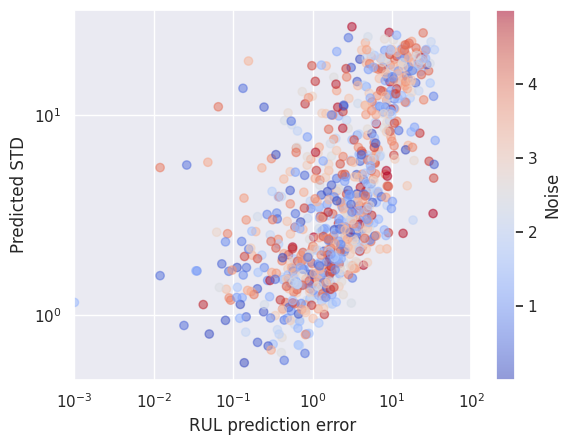

In [94]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.noise
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Noise')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.show()

/tmp/ipykernel_4949/4192766905.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='Drop frac')


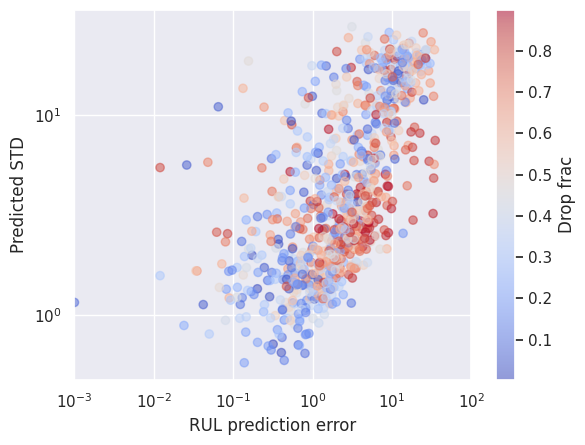

In [95]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.drop_frac
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='Drop frac')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.show()

/tmp/ipykernel_4949/1241191821.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  colorbar = plt.colorbar(label='RUL True')


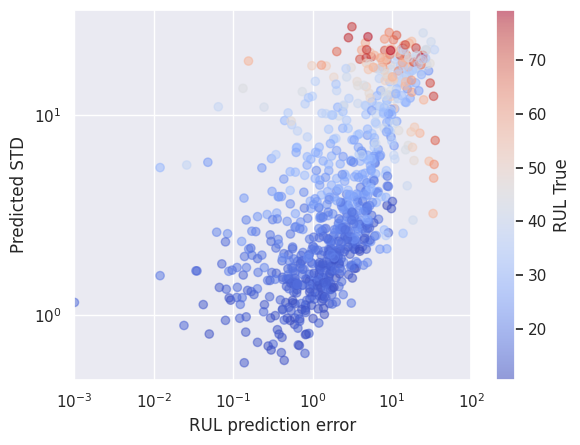

In [96]:
x_plt = df.rul_pred_error_abs
y_plt = df.rul_pred_std
z_plt = df.rul_true
plt.scatter(x_plt, y_plt, c=z_plt, cmap='coolwarm', alpha=0.5)
colorbar = plt.colorbar(label='RUL True')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('RUL prediction error')
plt.ylabel('Predicted STD')
plt.xlim(1e-3,1e2)
plt.show()

## Usecase: Non-linear RUL

In [6]:
def func(x, a, b, c, noise_amp = 0):
    y = a*x**b + c

    if noise_amp == 0:
        y = y
    else:
        y = y + noise_amp * np.random.randn(len(x))
    
    return y

**Parameter ranges**

In [7]:
x = np.arange(0,10,0.1)
a_range = (0, 2)
b_range = (1, 1.5)
c_range = (0, 10)
noise_range = (0,5)

**Test XGBRegressor ability to predict without noise**

In [8]:
# Create training and test data
np.random.seed(2049)
n_observations = 2000
a_list = np.random.rand(n_observations)*(a_range[1] - a_range[0]) + a_range[0]
b_list = np.random.rand(n_observations)*(b_range[1] - b_range[0]) + b_range[0]
c_list = np.random.rand(n_observations)*(c_range[1] - c_range[0]) + c_range[0]

targets = np.array(list(zip(a_list,b_list,c_list)))
features = np.array([func(x,a,b,c) for a, b, c in targets])

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=2049)

In [9]:
reg = XGBRegressor()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error
score = mean_squared_error(y_test, y_pred)
print(score)

0.007291536454173103


This shows that the model is working correctly.

**Now let's make many models**, but also add noise

In [11]:
n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,b_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
    features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

    reg = XGBRegressor(random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [10:02<00:00,  6.02s/it]

Done


**Make a test set and predict**

In [12]:
seed = np.random.randint(100000)
a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

targets = np.array(list(zip(a_list,b_list,c_list)))
targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

a_pred = []
b_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, b, c = result.T
    a_pred.append(a)
    b_pred.append(b)
    c_pred.append(c)

a_pred = np.array(a_pred).T
b_pred = np.array(b_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
b_mean = b_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 49.18it/s]


In [13]:
noise_list[:10]

array([4.7335037 , 0.47631612, 2.54895259, 1.93938088, 1.83058043,
       4.92195325, 2.28396409, 1.08268882, 1.8473478 , 3.35046762])

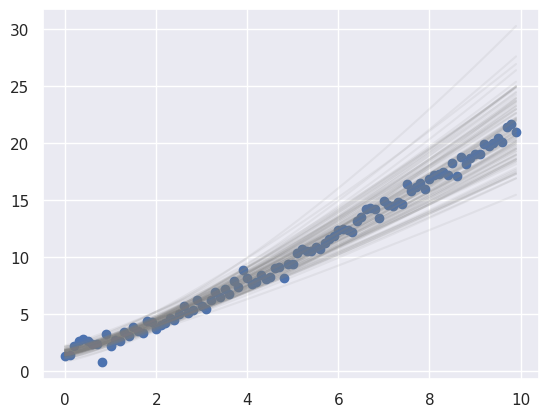

In [14]:
idx = 1

for idx_reg in range(n_regessors):

    plt.plot(x, func(x, a_pred[idx][idx_reg], b_pred[idx][idx_reg], c_pred[idx][idx_reg]), color='grey', alpha=0.1)

plt.scatter(x, features[idx])
plt.show()

(array([105., 100., 100., 100.,  96., 106., 103., 101.,  98.,  91.]),
 array([0.00594525, 0.50407919, 1.00221313, 1.50034707, 1.99848101,
        2.49661495, 2.99474889, 3.49288283, 3.99101677, 4.48915071,
        4.98728465]),
 <BarContainer object of 10 artists>)

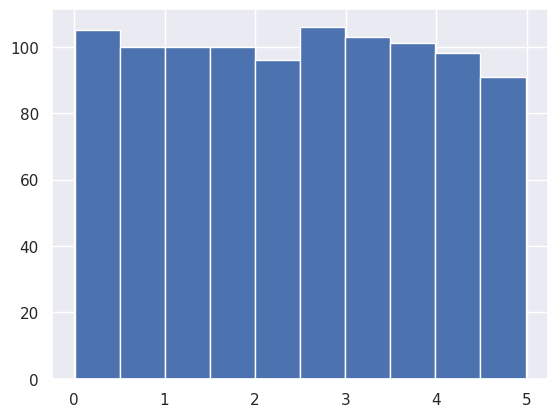

In [15]:
plt.hist(noise_list)

#### Refine the regressor

In [16]:
n_regessors = 100
n_training_obs = 1000
regressors = []
np.random.seed(2049)

for n in tqdm(range(n_regessors)):
    seed = np.random.randint(100000)

    a_list = np.random.rand(n_training_obs)*(a_range[1] - a_range[0]) + a_range[0]
    b_list = np.random.rand(n_training_obs)*(b_range[1] - b_range[0]) + b_range[0]
    c_list = np.random.rand(n_training_obs)*(c_range[1] - c_range[0]) + c_range[0]
    noise_list = np.random.rand(n_training_obs)*(noise_range[1] - noise_range[0]) + noise_range[0]

    targets = np.array(list(zip(a_list,b_list,c_list)))
    targets_with_noise = np.array(list(zip(a_list,b_list,c_list,noise_list)))
    features = np.array([func(x,a,b,c,noise) for a, b, c, noise in targets_with_noise])

    reg = XGBRegressor(n_estimators=30, max_depth=6, random_state=seed)
    reg.fit(features, targets)
    regressors.append(reg)

print('Done')

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [03:08<00:00,  1.89s/it]

Done


In [17]:
a_pred = []
b_pred = []
c_pred = []

for reg in tqdm(regressors):
    result = reg.predict(features)
    a, b, c = result.T
    a_pred.append(a)
    b_pred.append(b)
    c_pred.append(c)

a_pred = np.array(a_pred).T
b_pred = np.array(b_pred).T
c_pred = np.array(c_pred).T

a_mean = a_pred.mean(axis=1)
b_mean = b_pred.mean(axis=1)
c_mean = c_pred.mean(axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 132.20it/s]


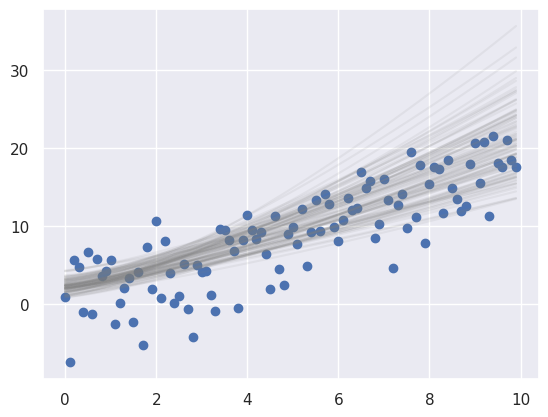

In [18]:
idx = 1

for idx_reg in range(n_regessors):

    plt.plot(x, func(x, a_pred[idx][idx_reg], b_pred[idx][idx_reg], c_pred[idx][idx_reg]), color='grey', alpha=0.1)

plt.scatter(x, features[idx])
plt.show()